## 1.Hello dl

In [1]:
import tensorflow as tf

2023-11-01 10:11:15.848688: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-11-01 10:11:15.848736: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-11-01 10:11:15.849723: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-11-01 10:11:15.950391: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-11-01 10:11:17.354560: W tensorflow/compiler/

In [4]:
tf.config.list_physical_devices("GPU")


[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [3]:
import tensorflow as tf
tf.__version__
from tensorflow.python.client import device_lib
device_lib.list_local_devices()

2023-11-01 10:11:32.602063: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:894] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-11-01 10:11:32.602496: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:894] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-11-01 10:11:32.602753: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:894] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysf

[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 13971614000191048192
 xla_global_id: -1,
 name: "/device:GPU:0"
 device_type: "GPU"
 memory_limit: 2676359168
 locality {
   bus_id: 1
   links {
   }
 }
 incarnation: 2390868567459036785
 physical_device_desc: "device: 0, name: NVIDIA GeForce GTX 1650 Ti, pci bus id: 0000:01:00.0, compute capability: 7.5"
 xla_global_id: 416903419]

### 데이터 무작정 읽어보기

In [8]:
import numpy as np

url = 'https://raw.githubusercontent.com/PinkWink/ML_tutorial/master/dataset/x09.txt'

raw_data = np.genfromtxt(url, skip_header=36)
raw_data

array([[  1.,   1.,  84.,  46., 354.],
       [  2.,   1.,  73.,  20., 190.],
       [  3.,   1.,  65.,  52., 405.],
       [  4.,   1.,  70.,  30., 263.],
       [  5.,   1.,  76.,  57., 451.],
       [  6.,   1.,  69.,  25., 302.],
       [  7.,   1.,  63.,  28., 288.],
       [  8.,   1.,  72.,  36., 385.],
       [  9.,   1.,  79.,  57., 402.],
       [ 10.,   1.,  75.,  44., 365.],
       [ 11.,   1.,  27.,  24., 209.],
       [ 12.,   1.,  89.,  31., 290.],
       [ 13.,   1.,  65.,  52., 346.],
       [ 14.,   1.,  57.,  23., 254.],
       [ 15.,   1.,  59.,  60., 395.],
       [ 16.,   1.,  69.,  48., 434.],
       [ 17.,   1.,  60.,  34., 220.],
       [ 18.,   1.,  79.,  51., 374.],
       [ 19.,   1.,  75.,  50., 308.],
       [ 20.,   1.,  82.,  34., 220.],
       [ 21.,   1.,  59.,  46., 311.],
       [ 22.,   1.,  67.,  23., 181.],
       [ 23.,   1.,  85.,  37., 274.],
       [ 24.,   1.,  55.,  40., 303.],
       [ 25.,   1.,  63.,  30., 244.]])

In [9]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
%matplotlib inline

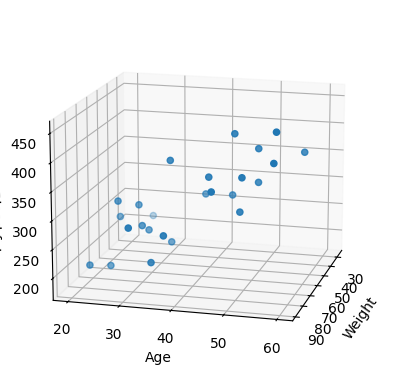

In [10]:
xs = np.array(raw_data[:, 2], dtype=np.float32)
ys = np.array(raw_data[:, 3], dtype=np.float32)
zs = np.array(raw_data[:, 4], dtype=np.float32)

fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')
ax.scatter(xs, ys, zs)
ax.set_xlabel('Weight')
ax.set_ylabel('Age')
ax.set_zlabel('Blood fat')
ax.view_init(15,15)
plt.show()

## 우리의 목적 : x1,x2를 입력해서 y가 나오게 하는 weight와 bias를 구하는 것

In [11]:
x_data = np.array(raw_data[:, 2:4], dtype=np.float32)
y_data = np.array(raw_data[:, 4], dtype=np.float32)

y_data = y_data.reshape((25,1))

### 출력이 1개 입력이 2개

In [12]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(1, input_shape =(2,)),  
])

model.compile(optimizer='rmsprop', loss='mse')

2023-10-31 12:20:37.281332: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:894] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-10-31 12:20:37.281793: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:894] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-10-31 12:20:37.282009: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:894] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysf

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 3         
                                                                 
Total params: 3 (12.00 Byte)
Trainable params: 3 (12.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [15]:
hist = model.fit(x_data,y_data, epochs=5000)

Epoch 1/5000
1/1 [==============================] - 0s 9ms/step - loss: 1863.2050
Epoch 2/5000
1/1 [==============================] - 0s 6ms/step - loss: 1863.2007
Epoch 3/5000
1/1 [==============================] - 0s 6ms/step - loss: 1863.1968
Epoch 4/5000
1/1 [==============================] - 0s 8ms/step - loss: 1863.1929
Epoch 5/5000
1/1 [==============================] - 0s 8ms/step - loss: 1863.1885
Epoch 6/5000
1/1 [==============================] - 0s 10ms/step - loss: 1863.1841
Epoch 7/5000
1/1 [==============================] - 0s 7ms/step - loss: 1863.1804
Epoch 8/5000
1/1 [==============================] - 0s 10ms/step - loss: 1863.1759
Epoch 9/5000
1/1 [==============================] - 0s 9ms/step - loss: 1863.1718
Epoch 10/5000
1/1 [==============================] - 0s 7ms/step - loss: 1863.1678
Epoch 11/5000
1/1 [==============================] - 0s 9ms/step - loss: 1863.1635
Epoch 12/5000
1/1 [==============================] - 0s 9ms/step - loss: 1863.1594
Epoch 13/50

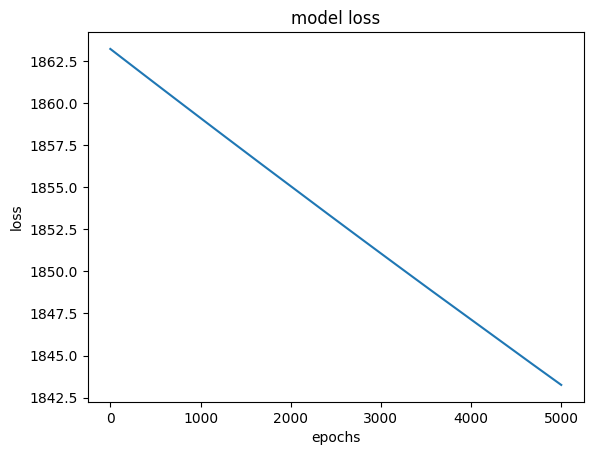

In [16]:
plt.plot(hist.history['loss'])
plt.title('model loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.show()

In [17]:
model.predict(np.array([100, 44]).reshape(1,2))

1/1 [==============================] - 0s 84ms/step


array([[373.26126]], dtype=float32)

In [18]:
model.predict(np.array([60,25]).reshape(1,2))

1/1 [==============================] - 0s 21ms/step


array([[220.17603]], dtype=float32)

In [21]:
W_, b_ = model.get_weights()
print("w:", W_)
print("b" ,b_)

w: [[1.1923177]
 [5.546974 ]]
b [9.962623]


In [22]:
x = np.linspace(20,100, 50).reshape(50,1)
y = np.linspace(10, 70, 50).reshape(50,1)

X = np.concatenate((x, y), axis=1)
Z = np.matmul(X, W_) + b_

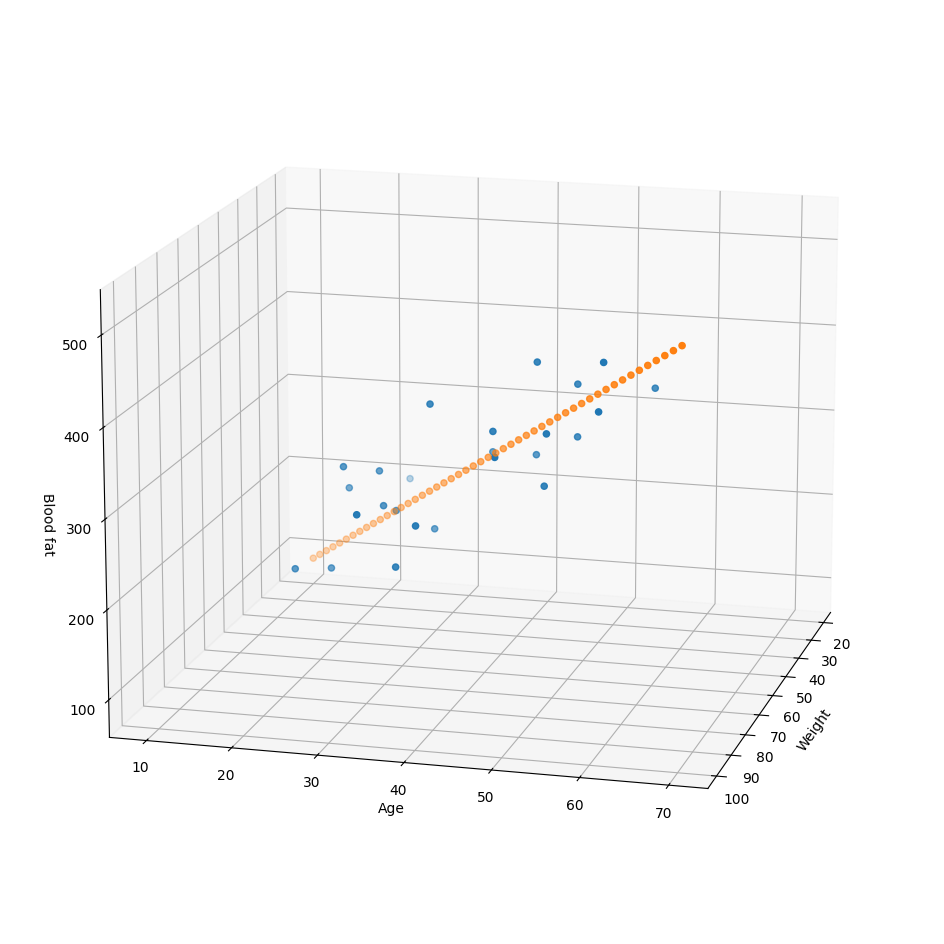

In [23]:
fig = plt.figure(figsize=(12,12))
ax = fig.add_subplot(111, projection = '3d')

ax.scatter(xs, ys, zs)
ax.scatter(x, y, Z)
ax.set_xlabel('Weight')
ax.set_ylabel('Age')
ax.set_zlabel('Blood fat')
ax.view_init(15, 15)
plt.show()

### XOR

In [24]:
import numpy as np

X = np.array([ [0, 0],
              [1, 0],
              [0, 1],
              [1, 1],
              ])
y = np.array([[0], [1], [1], [0]])

In [25]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(2, activation='sigmoid', input_shape=(2,)),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [26]:
model.compile(optimizer=tf.keras.optimizers.SGD(lr=0.1), loss='mse')

In [27]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 2)                 6         
                                                                 
 dense_2 (Dense)             (None, 1)                 3         
                                                                 
Total params: 9 (36.00 Byte)
Trainable params: 9 (36.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [32]:
hist = model.fit(X, y, epochs=20000, batch_size=1)

Epoch 1/20000
4/4 [==============================] - 0s 3ms/step - loss: 0.2363
Epoch 2/20000
4/4 [==============================] - 0s 5ms/step - loss: 0.2363
Epoch 3/20000
1/4 [======>.......................] - ETA: 0s - loss: 0.2142

4/4 [==============================] - 0s 3ms/step - loss: 0.2363
Epoch 4/20000
4/4 [==============================] - 0s 4ms/step - loss: 0.2362
Epoch 5/20000
4/4 [==============================] - 0s 5ms/step - loss: 0.2362
Epoch 6/20000
4/4 [==============================] - 0s 4ms/step - loss: 0.2362
Epoch 7/20000
4/4 [==============================] - 0s 5ms/step - loss: 0.2362
Epoch 8/20000
4/4 [==============================] - 0s 4ms/step - loss: 0.2362
Epoch 9/20000
4/4 [==============================] - 0s 5ms/step - loss: 0.2362
Epoch 10/20000
4/4 [==============================] - 0s 5ms/step - loss: 0.2362
Epoch 11/20000
4/4 [==============================] - 0s 5ms/step - loss: 0.2362
Epoch 12/20000
4/4 [==============================] - 0s 4ms/step - loss: 0.2362
Epoch 13/20000
4/4 [==============================] - 0s 4ms/step - loss: 0.2362
Epoch 14/20000
4/4 [==============================] - 0s 4ms/step - loss: 0.2362
Epoch 15/20000
4/4 [=============================

In [33]:
model.predict(X)

1/1 [==============================] - 0s 24ms/step


array([[0.11033349],
       [0.6545947 ],
       [0.6547725 ],
       [0.6719718 ]], dtype=float32)

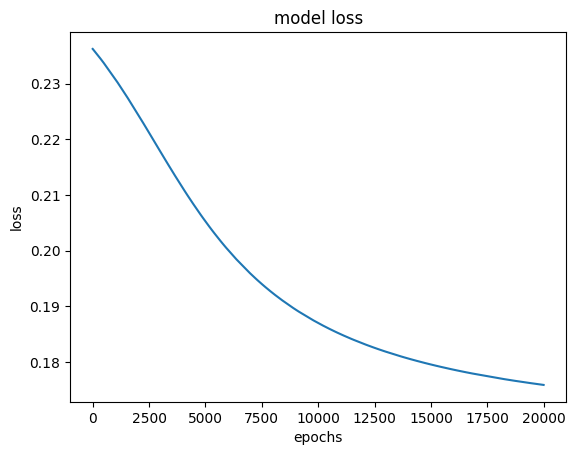

In [34]:
import matplotlib.pyplot as plt
%matplotlib inline


plt.plot(hist.history['loss'])
plt.title('model loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.show()

### 가중치

In [35]:
for w in model.weights:
    print('------')
    print(w)

------
<tf.Variable 'dense_1/kernel:0' shape=(2, 2) dtype=float32, numpy=
array([[ 4.981264 , -2.7012713],
       [ 4.9723926, -2.7480466]], dtype=float32)>
------
<tf.Variable 'dense_1/bias:0' shape=(2,) dtype=float32, numpy=array([-0.7397433, -1.0721164], dtype=float32)>
------
<tf.Variable 'dense_2/kernel:0' shape=(2, 1) dtype=float32, numpy=
array([[ 3.6793187],
       [-1.2390803]], dtype=float32)>
------
<tf.Variable 'dense_2/bias:0' shape=(1,) dtype=float32, numpy=array([-2.9600143], dtype=float32)>


### 이번에는 분류

In [36]:
from sklearn.datasets import load_iris

iris = load_iris()

X = iris.data
y = iris.target

In [37]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

### 원 핫 인코딩
- error의 편향을 줄이기 위해서 한다

In [38]:
from sklearn.preprocessing import OneHotEncoder

enc = OneHotEncoder(sparse=False, handle_unknown='ignore')
enc.fit(y.reshape(len(y), 1))

/home/soomin/venv/dl/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


OneHotEncoder(handle_unknown='ignore', sparse=False, sparse_output=False)

In [39]:
enc.categories_

[array([0, 1, 2])]

In [40]:
y_onehot = enc.transform(y.reshape(len(y), 1))
y_onehot

array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0

In [41]:
from sklearn.model_selection import train_test_split

tr_dt, te_dt, tr_lb, te_lb = train_test_split(X, y_onehot, test_size=0.2,
                                              random_state=13)

In [42]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(32, input_shape=(4,), activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax'),
])

In [43]:
model.compile(optimizer='adam', loss='categorical_crossentropy',
              metrics=['accuracy'])

In [44]:
hist = model.fit(tr_dt, tr_lb, epochs=100)

Epoch 1/100
4/4 [==============================] - 2s 4ms/step - loss: 1.2152 - accuracy: 0.3917
Epoch 2/100
4/4 [==============================] - 0s 6ms/step - loss: 1.0781 - accuracy: 0.5500
Epoch 3/100
4/4 [==============================] - 0s 5ms/step - loss: 0.9974 - accuracy: 0.6500
Epoch 4/100
4/4 [==============================] - 0s 5ms/step - loss: 0.9549 - accuracy: 0.6833
Epoch 5/100
4/4 [==============================] - 0s 5ms/step - loss: 0.9197 - accuracy: 0.4500
Epoch 6/100
4/4 [==============================] - 0s 5ms/step - loss: 0.8866 - accuracy: 0.5417
Epoch 7/100
4/4 [==============================] - 0s 6ms/step - loss: 0.8530 - accuracy: 0.4667
Epoch 8/100
4/4 [==============================] - 0s 5ms/step - loss: 0.8221 - accuracy: 0.6583
Epoch 9/100
4/4 [==============================] - 0s 6ms/step - loss: 0.7904 - accuracy: 0.6917
Epoch 10/100
4/4 [==============================] - 0s 5ms/step - loss: 0.7620 - accuracy: 0.6917
Epoch 11/100
4/4 [===========

In [45]:
model.evaluate(te_dt, te_lb, verbose=2)

1/1 - 0s - loss: 0.1042 - accuracy: 0.9667 - 171ms/epoch - 171ms/step


[0.10417631268501282, 0.9666666388511658]

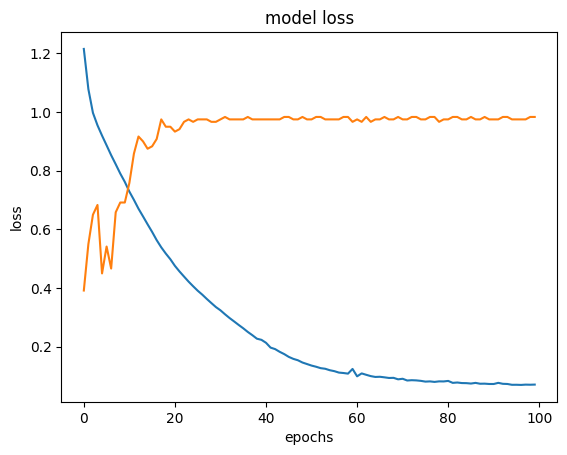

In [46]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['accuracy'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.show()